#Reduccion de dimensiones (PCA)

**Estudiante: Roly Anibal Quellca Hancco <br>
Código de Estudiante:171826**

**Preparacion de librerias**
En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn y Scipy para el análisis,
- Mtplotlib para los gráficos.
- Pandas para el manejo de datos
-numpy para el manejo de arrays

**importamos librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
#cargamos los datos de entrada
dataframe = pd.read_csv(r"comprar_alquilar.csv")
print(dataframe.tail(10)) 

     ingresos  gastos_comunes  pago_coche  ...  hijos  trabajo  comprar
192      4653            1024         447  ...      0        3        0
193      3390             881         194  ...      2        5        0
194      2969             623          72  ...      2        6        0
195      4169            1292          48  ...      1        7        1
196      4054            1095         371  ...      0        3        0
197      3831             690         352  ...      0        2        0
198      3961            1030         270  ...      3        8        0
199      3184             955         276  ...      3        8        0
200      3334             867         369  ...      2        5        0
201      3988            1157         105  ...      0        4        0

[10 rows x 10 columns]


**Normalizamos los datos**

In [ ]:
scaler=StandardScaler()
df = dataframe.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo


**Instanciamos objeto PCA y aplicamos**

In [ ]:
# Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca=PCA(n_components=9) 
# obtener los componentes principales
pca.fit(X_scaled) 
# convertimos nuestros datos con las nuevas dimensiones de PCA
X_pca=pca.transform(X_scaled) 
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada 

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


**graficamos el acumulado de varianza explicada en las nuevas dimensiones**

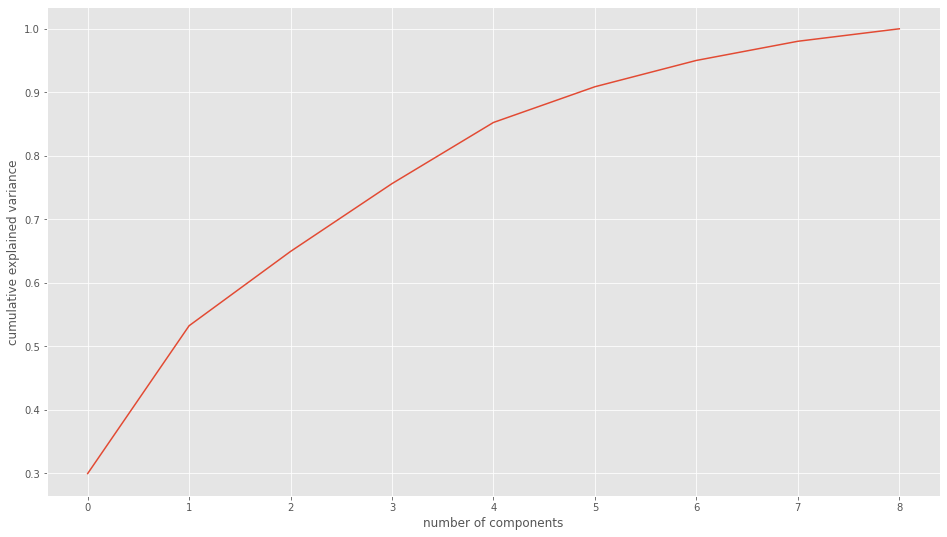

In [ ]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

**graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales**

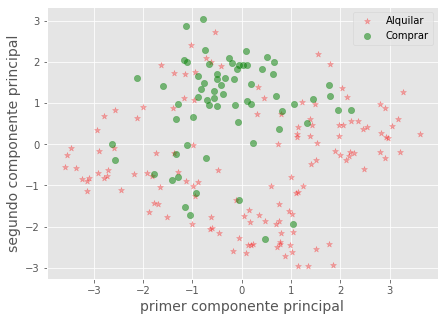

In [ ]:

Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("primer componente principal",fontsize=14)
plt.ylabel("segundo componente principal",fontsize=14)
plt.legend()
plt.show()